# Hierarchical Clustering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('EastWestAirlines.xlsx', sheet_name = 'data')
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID#,3999.0,2014.819455,1160.764358,1.0,1010.5,2016.0,3020.5,4021.0
Balance,3999.0,73601.327582,100775.664958,0.0,18527.5,43097.0,92404.0,1704838.0
Qual_miles,3999.0,144.114529,773.663804,0.0,0.0,0.0,0.0,11148.0
cc1_miles,3999.0,2.059515,1.376919,1.0,1.0,1.0,3.0,5.0
cc2_miles,3999.0,1.014504,0.147650,1.0,1.0,1.0,1.0,3.0
cc3_miles,3999.0,1.012253,0.195241,1.0,1.0,1.0,1.0,5.0
Bonus_miles,3999.0,17144.846212,24150.967826,0.0,1250.0,7171.0,23800.5,263685.0
Bonus_trans,3999.0,11.601900,9.603810,0.0,3.0,12.0,17.0,86.0
Flight_miles_12mo,3999.0,460.055764,1400.209171,0.0,0.0,0.0,311.0,30817.0
Flight_trans_12,3999.0,1.373593,3.793172,0.0,0.0,0.0,1.0,53.0


In [5]:
# Renaming columns
df = df.rename({'ID#':'ID','Award?':'Award'}, axis = 1)
df.head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [6]:
# Checking for all the values in dataset of type integer, if not replacing them with nan
def check_int(df):
    count = 0
    for row in df:
        try:
            if type(row) != int:
                df.loc[count] = np.nan
        except:
            pass
        count +=1

In [7]:
check_int(df[df.columns])

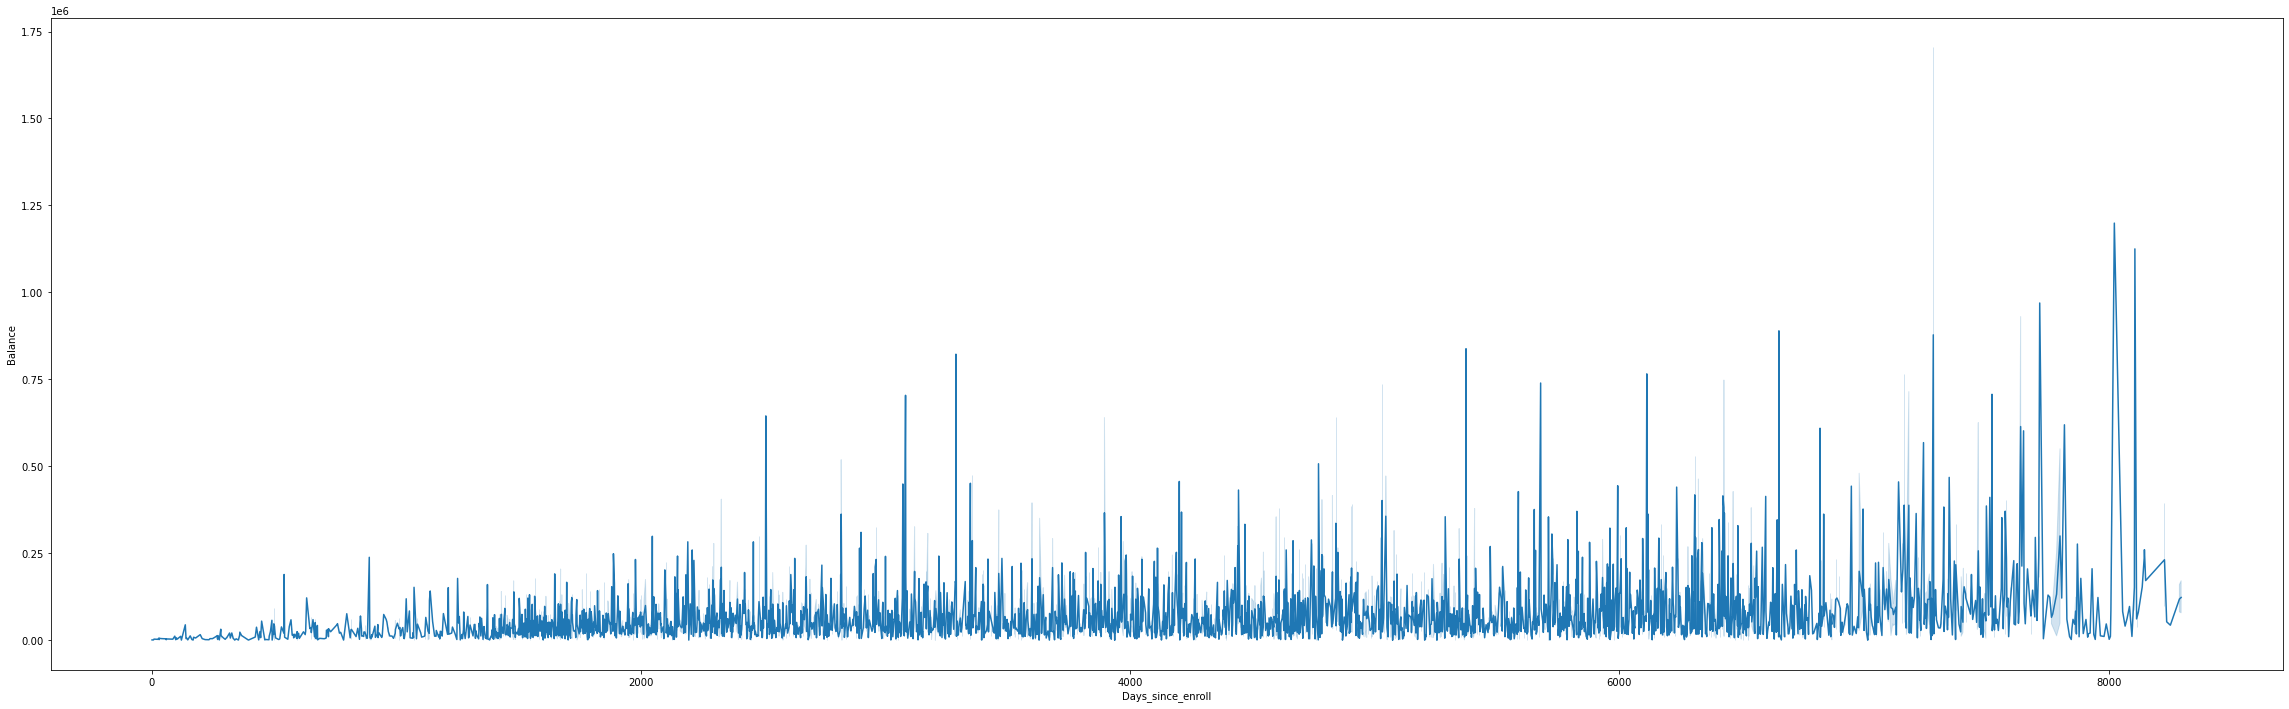

In [8]:
# Checking relation between Balance and Days_since_enroll
import seaborn as sns
fig, ax =plt.subplots(figsize=(40,12))
ax = sns.lineplot(x= 'Days_since_enroll', y='Balance',data = df)

In [9]:
df1 = df.drop('ID', axis = 1)
df1.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


In [10]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [11]:
scaler1 = MinMaxScaler()
scaler2 = StandardScaler()

In [12]:
# Normalizing Dataset
scaler1_df = scaler1.fit_transform(df1)
print(scaler1_df)

print('\n')

scaler2_df = scaler2.fit_transform(df1)
print(scaler2_df)

[[0.01650773 0.         0.         ... 0.         0.84374246 0.        ]
 [0.01128788 0.         0.         ... 0.         0.83988425 0.        ]
 [0.02425685 0.         0.         ... 0.         0.84784181 0.        ]
 ...
 [0.0431695  0.         0.5        ... 0.         0.16879672 1.        ]
 [0.03220189 0.         0.         ... 0.01886792 0.16867615 0.        ]
 [0.00176908 0.         0.         ... 0.         0.16831444 0.        ]]


[[-4.51140783e-01 -1.86298687e-01 -7.69578406e-01 ... -3.62167870e-01
   1.39545434e+00 -7.66919299e-01]
 [-5.39456874e-01 -1.86298687e-01 -7.69578406e-01 ... -3.62167870e-01
   1.37995704e+00 -7.66919299e-01]
 [-3.20031232e-01 -1.86298687e-01 -7.69578406e-01 ... -3.62167870e-01
   1.41192021e+00 -7.66919299e-01]
 ...
 [-4.29480975e-05 -1.86298687e-01  6.83121167e-01 ... -3.62167870e-01
  -1.31560393e+00  1.30391816e+00]
 [-1.85606976e-01 -1.86298687e-01 -7.69578406e-01 ... -9.85033311e-02
  -1.31608822e+00 -7.66919299e-01]
 [-7.00507951e-01 -1.862

In [13]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

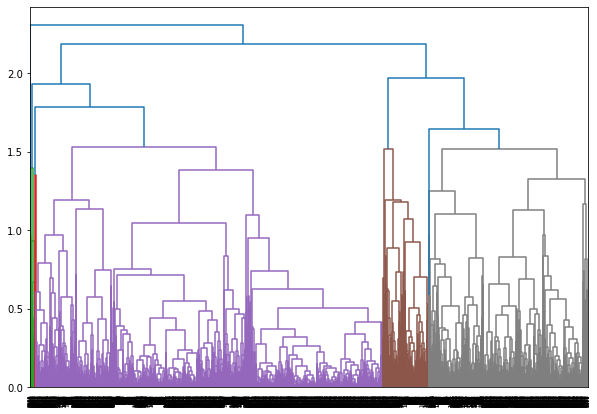

In [14]:
plt.figure(figsize=(10, 7))  
dendograms=sch.dendrogram(sch.linkage(scaler1_df,'complete'))

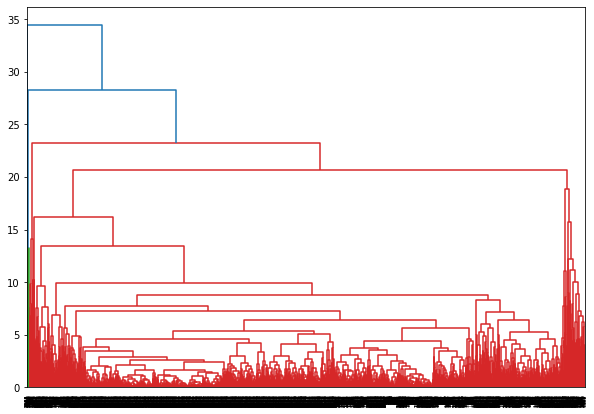

In [15]:
plt.figure(figsize=(10, 7))  
dendograms=sch.dendrogram(sch.linkage(scaler2_df,'complete'))

In [16]:
hc=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
hc

AgglomerativeClustering(n_clusters=5)

In [18]:
y=pd.DataFrame(hc.fit_predict(scaler1_df),columns=['clustersid'])
y['clustersid'].value_counts()

1    1011
0     946
2     808
4     699
3     535
Name: clustersid, dtype: int64

In [20]:
df['clustersid_s1']=hc.labels_
df

df1['clustersid_s1']=hc.labels_

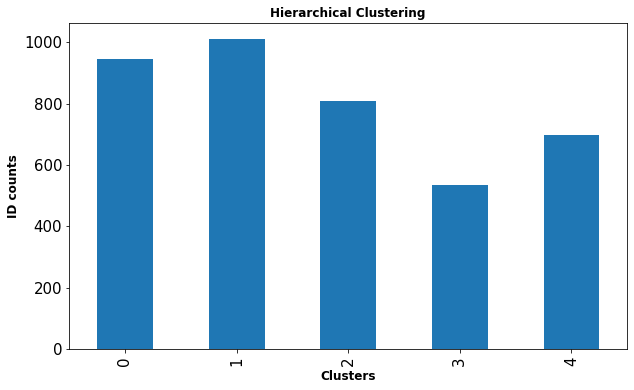

In [22]:
fig, ax = plt.subplots(figsize=(10, 6))
df.groupby(['clustersid_s1']).count()['ID'].plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('Hierarchical Clustering',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()


In [23]:
df1.groupby('clustersid_s1').agg(['mean']).reset_index()

,clustersid_s1,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,79848.233615,285.097252,1.699789,1.024313,1.000000,12079.774841,12.133192,781.939746,2.369979,4372.173362,1.0
1,1,43313.653808,21.506429,1.000000,1.033630,1.000989,2562.614243,5.474777,169.510386,0.523244,4940.680514,0.0
2,2,106221.111386,161.262376,3.198020,1.001238,1.025990,26458.257426,16.363861,198.733911,0.558168,4367.250000,0.0
3,3,127475.028037,160.801869,4.362617,1.000000,1.050467,58656.919626,22.235514,991.110280,3.005607,5072.226168,1.0
4,4,30013.416309,98.054363,1.000000,1.000000,1.000000,2552.569385,6.101574,340.274678,0.948498,1568.864092,0.0


In [24]:
from sklearn.metrics import silhouette_score

In [25]:
sil_score= silhouette_score(scaler1_df, hc.labels_)
sil_score

0.3762586351398372

In [26]:
y=pd.DataFrame(hc.fit_predict(scaler2_df),columns=['clustersid'])
y['clustersid'].value_counts()

1    2446
0    1362
2     130
3      43
4      18
Name: clustersid, dtype: int64

In [27]:
df['clustersid_s2']=hc.labels_
df1['clustersid_s2']=hc.labels_

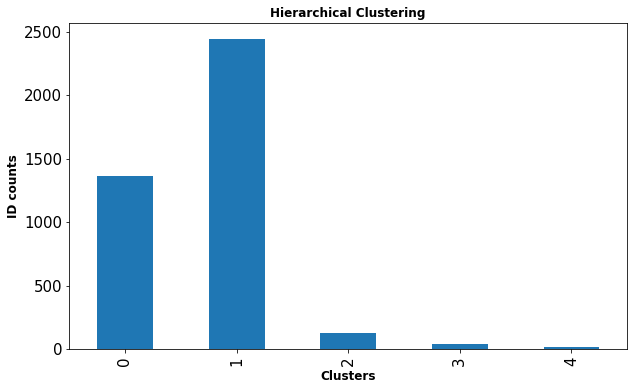

In [29]:
fig, ax = plt.subplots(figsize=(10, 6))
df.groupby(['clustersid_s2']).count()['ID'].plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('Hierarchical Clustering',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

In [30]:
df1.groupby('clustersid_s1').agg(['mean']).reset_index()

,clustersid_s1,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clustersid_s2
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,79848.233615,285.097252,1.699789,1.024313,1.000000,12079.774841,12.133192,781.939746,2.369979,4372.173362,1.0,0.627907
1,1,43313.653808,21.506429,1.000000,1.033630,1.000989,2562.614243,5.474777,169.510386,0.523244,4940.680514,0.0,1.044510
2,2,106221.111386,161.262376,3.198020,1.001238,1.025990,26458.257426,16.363861,198.733911,0.558168,4367.250000,0.0,0.507426
3,3,127475.028037,160.801869,4.362617,1.000000,1.050467,58656.919626,22.235514,991.110280,3.005607,5072.226168,1.0,0.261682
4,4,30013.416309,98.054363,1.000000,1.000000,1.000000,2552.569385,6.101574,340.274678,0.948498,1568.864092,0.0,1.011445


In [31]:
from sklearn.metrics import silhouette_score

sil_score= silhouette_score(scaler2_df, hc.labels_)
sil_score

0.3098805307874414

# K-MEANS Clustering

In [32]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [34]:
df2 = pd.read_excel('EastWestAirlines.xlsx', sheet_name = 'data')
df2.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [35]:
#Normalized data fuction
def norm_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return(x)

In [36]:
df_norm=norm_func(df.iloc[:,1:])

In [37]:
import warnings
warnings.filterwarnings('ignore')

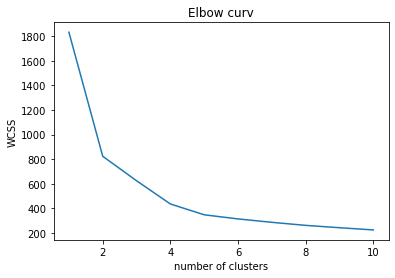

In [38]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df_norm)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow curv')
plt.xlabel('number of clusters')
plt.ylabel('WCSS')
plt.show()

In [39]:
# selecting 5 clusters from above scree plot
model=KMeans(n_clusters=5)
model.fit(df_norm)
model.labels_

array([3, 3, 3, ..., 1, 0, 0])

In [40]:
x=pd.Series(model.labels_)
df2['Cluster']=x

In [41]:
df2

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,3
1,2,19244,0,1,1,1,215,2,0,0,6968,0,3
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,3
3,4,14776,0,1,1,1,500,1,0,0,6952,0,3
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,2
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,2
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


In [42]:
df2.iloc[:,1:-1].groupby(df2.Cluster).mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
Cluster,,,,,,,,,,,
0,33097.301357,94.131783,1.070736,1.016473,1.006783,3244.520349,6.173450,212.850775,0.603682,1992.402132,0.0
1,108317.387376,198.336634,3.915842,1.001238,1.025990,45609.657178,20.201733,713.728960,2.142327,4863.439356,1.0
2,83529.153046,290.453195,1.156018,1.032689,1.008915,8850.395245,10.476969,1030.112927,3.148588,4338.867756,1.0
3,49921.633641,89.903226,1.122120,1.019585,1.001152,3467.074885,6.913594,243.834101,0.728111,5567.925115,0.0
4,118297.325243,73.467638,3.584142,1.001618,1.022654,31384.393204,17.233010,224.100324,0.627832,4419.553398,0.0


# DBSCAN

In [43]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [44]:
df3 = pd.read_excel('EastWestAirlines.xlsx', sheet_name = 'data')
df3.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [45]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [46]:
ps=df3.iloc[:,1:]

In [48]:
ps.values

array([[28143,     0,     1, ...,     0,  7000,     0],
       [19244,     0,     1, ...,     0,  6968,     0],
       [41354,     0,     1, ...,     0,  7034,     0],
       ...,
       [73597,     0,     3, ...,     0,  1402,     1],
       [54899,     0,     1, ...,     1,  1401,     0],
       [ 3016,     0,     1, ...,     0,  1398,     0]], dtype=int64)

In [49]:
stscaler=StandardScaler().fit(ps.values)
x=stscaler.transform(ps.values)

In [50]:
x

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [51]:
dbscan=DBSCAN(eps=1,min_samples=12)
dbscan.fit(x)

DBSCAN(eps=1, min_samples=12)

In [52]:
dbscan.labels_

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [53]:
y=pd.DataFrame(dbscan.fit_predict(scaler1_df),columns=['clusterid_DBSCAN'])
y['clusterid_DBSCAN'].value_counts()

0    2518
1    1481
Name: clusterid_DBSCAN, dtype: int64

In [54]:
psl=pd.DataFrame(dbscan.labels_,columns=['cluster'])
psl

,cluster
0,0
1,0
2,0
3,0
4,1
...,...
3994,1
3995,1
3996,1
3997,0


In [55]:
pd.concat([df3,psl],axis=1)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0
